<a href="https://colab.research.google.com/github/shafiqafat/CV/blob/main/92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.files import upload
file = upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

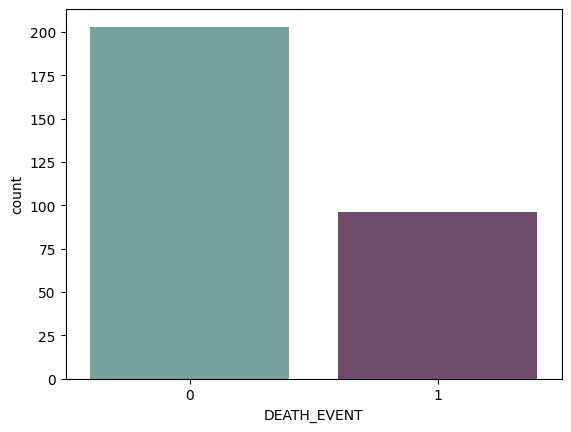

In [5]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [6]:
x= data.drop(["DEATH_EVENT"],axis=1)
y= data["DEATH_EVENT"]
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [7]:
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_df = s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df, columns=col_names)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y,test_size=0.25,random_state=7)


In [9]:
, models
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=30,
    restore_best_weights=True
)
model =Sequential()
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation= 'relu', input_dim = 12))
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

In [10]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 3s 103ms/step - loss: 0.6928 - accuracy: 0.6480 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 16ms/step - loss: 0.6919 - accuracy: 0.6480 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6901 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 17ms/step - loss: 0.6902 - accuracy: 0.6480 - val_loss: 0.6891 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 16ms/step - loss: 0.6892 - accuracy: 0.6480 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 17ms/step - loss: 0.6881 - accuracy: 0.6480 - val_loss: 0.6869 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 31ms/step - loss: 0.6875 - accuracy: 0.6480 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 8/500
6/6 [==

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 79.55%


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [ ]:
y_test

268    0
240    0
278    0
176    0
202    0
      ..
24     1
62     0
249    0
90     0
50     1
Name: DEATH_EVENT, Length: 75, dtype: int64

[[50  7]
 [ 8 10]]


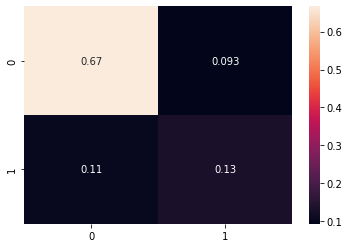

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)

In [ ]:
a = int(input())
b = int(input())
print(a+b)
print(a-b)
print(a*b)

3
5
8
-2
15
